In [221]:
#import relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [222]:
#read the data
df = pd.read_excel("movies.xlsx", index_col=0)

In [223]:
#view the head of the data
df.head()

,title,genre,wiki_plot,imdb_plot
rank,,,,
0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t..."
1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker..."
2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...
3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat..."
4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1..."


In [224]:
#view the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 4 columns):
title        100 non-null object
genre        100 non-null object
wiki_plot    100 non-null object
imdb_plot    90 non-null object
dtypes: object(4)
memory usage: 3.9+ KB


In [225]:
#view the description of the data
df.describe()

,title,genre,wiki_plot,imdb_plot
count,100,100,100,90
unique,100,61,100,90
top,Saving Private Ryan,[u' Drama'],"] \n George Eastman (Montgomery Clift), th...","Joe and Jerry, a saxophonist and bassist, resp..."
freq,1,11,1,1


In [226]:
#create a new column called plots that merges the wiki_plot and imdb_plot
df["plots"] = df["wiki_plot"].astype(str) + "\n" + df["imdb_plot"].astype(str)

In [227]:
#view the head of the data again that includes the new column
df.head()

,title,genre,wiki_plot,imdb_plot,plots
rank,,,,,
0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","On the day of his only daughter's wedding, Vit..."
1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","In 1947, banker Andy Dufresne is convicted of ..."
2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"In 1939, the Germans move Polish Jews into the..."
3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","In a brief scene in 1964, an aging, overweight..."
4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...",It is early December 1941. American expatriate...


In [228]:
#create a new column that shows the number of words in each plot
df["length"] = df["plots"].apply(len)

In [229]:
df.head()

,title,genre,wiki_plot,imdb_plot,plots,length
rank,,,,,,
0,The Godfather,"[u' Crime', u' Drama']","On the day of his only daughter's wedding, Vit...","In late summer 1945, guests are gathered for t...","On the day of his only daughter's wedding, Vit...",26878
1,The Shawshank Redemption,"[u' Crime', u' Drama']","In 1947, banker Andy Dufresne is convicted of ...","In 1947, Andy Dufresne (Tim Robbins), a banker...","In 1947, banker Andy Dufresne is convicted of ...",22533
2,Schindler's List,"[u' Biography', u' Drama', u' History']","In 1939, the Germans move Polish Jews into the...",The relocation of Polish Jews from surrounding...,"In 1939, the Germans move Polish Jews into the...",16008
3,Raging Bull,"[u' Biography', u' Drama', u' Sport']","In a brief scene in 1964, an aging, overweight...","The film opens in 1964, where an older and fat...","In a brief scene in 1964, an aging, overweight...",16108
4,Casablanca,"[u' Drama', u' Romance', u' War']",It is early December 1941. American expatriate...,"In the early years of World War II, December 1...",It is early December 1941. American expatriate...,14130


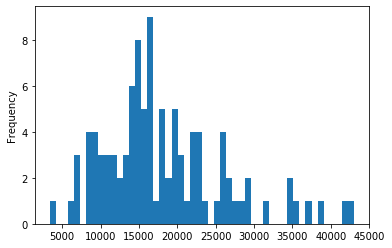

In [230]:
#a histogram that shows the distribution of the number of words
df["length"].plot.hist(bins = 50)

In [231]:
df["length"].describe()

count      100.000000
mean     18177.020000
std       8000.486471
min       3377.000000
25%      13305.000000
50%      16240.000000
75%      22105.250000
max      43049.000000
Name: length, dtype: float64

In [232]:
#import the nltk library
import nltk

In [233]:
#import the string library 
import string

In [234]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [235]:
stemmer = SnowballStemmer("english")

In [237]:
#a function that process the texts in the plots using stop words and also for normailizing the text
def text_process(plot):
    no_punc = [char for char in plot if char not in string.punctuation]
    no_punc = ''.join(no_punc)
    no_punc_mod = [word for word in no_punc.split() if word.lower not in stopwords.words('english')]
    stems = [stemmer.stem(word) for word in no_punc_mod]
    return stems


In [238]:
#applying the function to the first five rows of the plot column to see
df['plots'].head(5).apply(text_process)

rank
0    [on, the, day, of, his, onli, daughter, wed, v...
1    [in, 1947, banker, andi, dufresn, is, convict,...
2    [in, 1939, the, german, move, polish, jew, int...
3    [in, a, brief, scene, in, 1964, an, age, overw...
4    [it, is, earli, decemb, 1941, american, expatr...
Name: plots, dtype: object

In [239]:
#importing the CoubtVectorizer library
from sklearn.feature_extraction.text import CountVectorizer

In [240]:
#bag of words transformer to vectorize our text
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['plots'])

In [241]:
#print the length of the vocabularies in our bag of words
print(len(bow_transformer.vocabulary_))

12806


In [242]:
#transform our plots into a bag of words
plots_bow = bow_transformer.transform(df['plots'])

In [243]:
#show the shape of our plots bag of words
print(plots_bow.shape)

(100, 12806)


In [244]:
#non zero occurences
plots_bow.nnz

63335

In [245]:
#import the term-frequency inverse document frequency library
from sklearn.feature_extraction.text import TfidfTransformer

In [246]:
tfidf_transformer = TfidfTransformer().fit(plots_bow)

In [247]:
plots_tfidf = tfidf_transformer.transform(plots_bow)

In [248]:
print(plots_tfidf.shape)

(100, 12806)


In [249]:
#import Kmeans
from sklearn.cluster import KMeans

In [250]:
kmeans = KMeans(n_clusters=5)

In [252]:
#fit the vectorized and normalized text data
kmeans.fit(plots_tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [253]:
#create a list of the labels and save it in a variable called clusters
clusters = kmeans.labels_.tolist()

In [254]:
#create a new column called cluster
df["cluster"] = clusters

In [255]:
df['cluster'].value_counts()

2    65
0    30
3     2
1     2
4     1
Name: cluster, dtype: int64

In [256]:
#import cosine similarity library
from sklearn.metrics.pairwise import cosine_similarity

In [257]:
#calculate the similarity distance of the vectorized and normalised text data
similarity_distance = 1 - cosine_similarity(plots_tfidf)

In [219]:
#library to plot dendrogram
from scipy.cluster.hierarchy import linkage, dendrogram

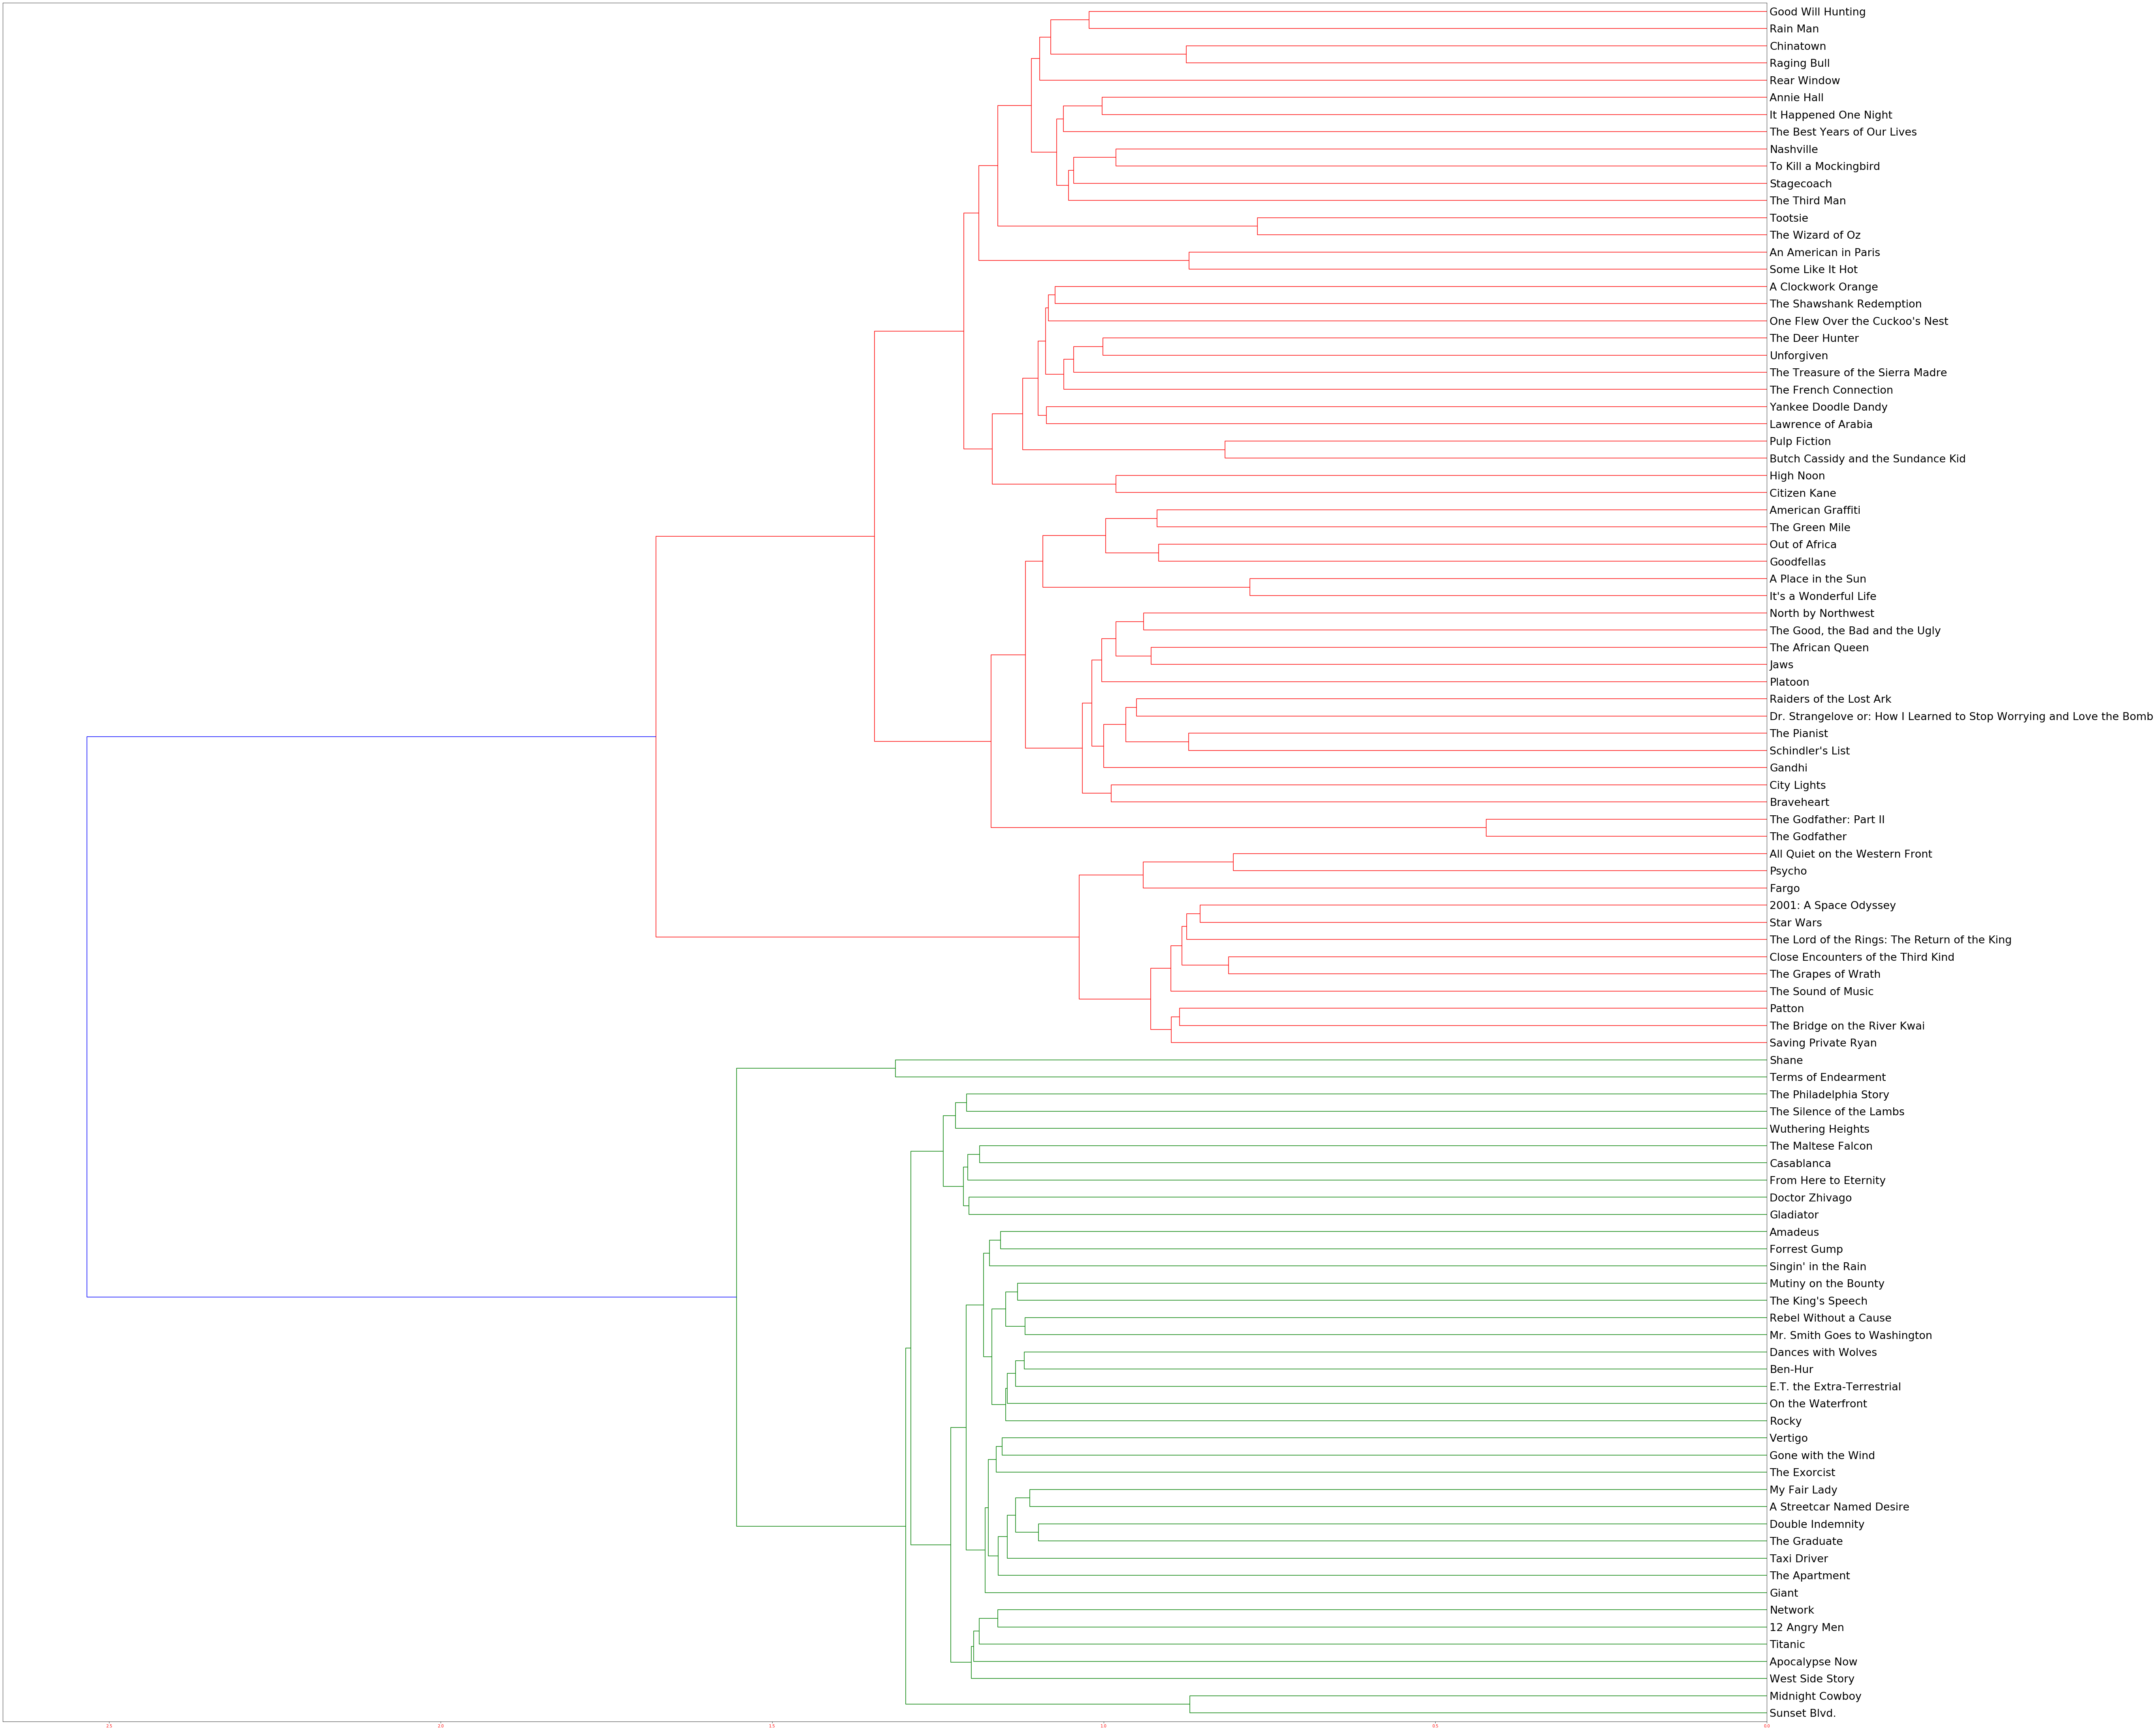

In [261]:
mergings = linkage(similarity_distance, method="complete")

dendrogram_plot = dendrogram(mergings, orientation='left', labels=[title for title in df["title"]], leaf_font_size=27)

fig = plt.gcf()
p = [label.set_color('r') for label in plt.gca().get_xmajorticklabels()]
fig.set_size_inches(80,80)
plt.show()